In [1]:
''' Project HER-Handwritten Equation Recognizer
    Versions
    
    Current: ASAT1906220907 [Coffee]
    Version: 0.32-a [Coffee]
    
    Changelog:
    
    S.No.    Version          Build No.                  Release Name           Changes
    ------------------------------------------------------------------------------------------------------------------------
    1.       0.1-a            ASAT1906152333             Atomic                 Initial Release
    
    2.       0.11-a           ASUN1906162219             Atomic                 Data Separation for traininng successfullly
                                                                                completed and the CNN model's parameters 
                                                                                have successfully been tweaked
                                                                                     
    3.       0.12-a           ATUE1906189931             Atomic                 Same as above but with model optimizations
                                                                                ## TODOS: encode the labels and train_y_labels
                                                                                is broken
    
    4.       0.2-a            ATUE1906182214             Blizzard               Made the network be trained and tried to fix its
                                                                                low accuracy
                                                                
    5.       0.21-a           AWED1906192300             Blizzard               Reorganized the dataset to include batch size
                                                                                started training the model
                                                                                     
    6.       0.3-a            ATHU1906200804             Coffee                 Re-trained the model for 50 epochs and made
                                                                                a snapshot for the next day's demonstration
                                                                                
    7.       0.31-a           AFRI1906210636             Coffee                 Re-trained and optimized the model
    
    8.       0.32-a           ASAT1906220907             Coffee                 Final Optimization and freezing of model 
                                                                                training
                                                                            
    9.       0.33-a           ASAT1906222344             Coffee                 Snapshot and freezing with final test accuracy 
                                                                                of 85.71% 
'''

" Project HER-Handwritten Equation Recognizer\n    Versions\n    \n    Current: ASAT1906220907 [Coffee]\n    Version: 0.32-a [Coffee]\n    \n    Changelog:\n    \n    S.No.    Version          Build No.                  Release Name           Changes\n    ------------------------------------------------------------------------------------------------------------------------\n    1.       0.1-a            ASAT1906152333             Atomic                 Initial Release\n    \n    2.       0.11-a           ASUN1906162219             Atomic                 Data Separation for traininng successfullly\n                                                                                completed and the CNN model's parameters \n                                                                                have successfully been tweaked\n                                                                                     \n    3.       0.12-a           ATUE1906189931             Atomic         

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split
import os
from torch.utils.data import DataLoader
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
from livelossplot import PlotLosses

In [4]:
CATEGORIES = []
DIR = 'extracted_images/'
for category in os.listdir(DIR):
    CATEGORIES.append(category)
    
np.save('Labels_her', CATEGORIES)

In [5]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(45, 32, kernel_size=5, stride=1, padding=3),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size = 2, stride=2)
        )
        self.layer2=nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=3),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer3=nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=3),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.drop_out = nn.Dropout()
        self.ffnn1 = nn.Linear(128*7, 500)
        self.ffnn2 = nn.Linear(500, 250)
        self.ffnn3 = nn.Linear(250, 24)
        
    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = output.reshape(output.size(0), -1)
        output = self.drop_out(output)
        output = self.ffnn1(output)
        output = self.ffnn2(output)
        output = self.ffnn3(output)
        return F.log_softmax(output)
    
net = Model().to(device)
print(net)   

Model(
  (layer1): Sequential(
    (0): Conv2d(45, 32, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.5)
  (ffnn1): Linear(in_features=896, out_features=500, bias=True)
  (ffnn2): Linear(in_features=500, out_features=250, bias=True)
  (ffnn3): Linear(in_features=250, out_features=24, bias=True)
)


In [6]:
data_X = np.load('herX.npy')/255.
data_y = np.load('herY.npy')
data_X.shape

(99809, 45, 45, 1)

In [7]:
import os
def get_categories(x):
    o_path = os.path.join("extracted_images/")
    print(os.listdir(o_path)[x])

In [8]:

#data_normalize = np.reshape(data_X, (-1,))
#data_normalize.shape
#data_n = (data_normalize - np.mean(data_normalize))/np.std(data_normalize)
#data_X = np.reshape(data_n, (-1, 45, 45, 1))
#data_normal = data_X-np.mean(data_X)
#data_normal = data_normal/np.max(data_X)
#data_X = data_normal

In [9]:
data_X.min()

0.0

In [10]:
#data_X = data_X/255
#data_X

In [11]:
data_y

array([10,  0, 12, ...,  9, 23,  9])

In [12]:
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [13]:
train_X_tensor = torch.from_numpy(train_X).float().to(device)
train_y_tensor = torch.from_numpy(train_y).long().to(device)
test_X_tensor = torch.from_numpy(test_X).float().to(device)
test_y_tensor = torch.from_numpy(test_y).long().to(device)

train_X_data = DataLoader(dataset=train_X_tensor, batch_size = 300, shuffle = False)
train_y_data = DataLoader(dataset =train_y_tensor, batch_size = 300, shuffle = False)
test_X_data = DataLoader(dataset=test_X_tensor, batch_size = 300, shuffle = False)
test_y_data = DataLoader(dataset =test_y_tensor, batch_size = 300, shuffle = False)

In [14]:
#import matplotlib.pyplot as plt
#from skimage.color import rgb2gray
#npx = next(iter(train_X_data)).cpu().numpy()*255
#npy = next(iter(train_y_data)).cpu().numpy()
#npx = npx[0,:,:,0]
#npx.shape
#plt.imshow(npx, cmap='gray')
#print(npy)

In [15]:
train_X.shape

(66872, 45, 45, 1)

In [16]:
train_y.shape

(66872,)

In [17]:
test_X.shape

(32937, 45, 45, 1)

In [18]:
test_y.shape

(32937,)

In [19]:
learning_rate = 0.001
epochs_total = 1000

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)
import matplotlib.pyplot as plt

In [21]:
print(next(iter(train_y_data)).cpu().numpy())

[ 6  6  7  4  8  5 14  5  6  5  1 10 11  7  0  5  5  7 11 11 15 14 11 12
 15  4  6 14  6 11  2  7  7  3  2  1  7  3 13 15  2 10 10 12 10 11  8  8
  5  7  4  7  2  4  4 10  2  4  2 22  5 13 16  4  6  8 13 15 13 14  8 14
 12 11  2 21 15 10 11  2 13 12 13  7  9 12  8 16  5  4  0  5 11  8  6  6
 14  8 14 13 10  4 13 13 19 11  9  2  7  4  5 22  5 11  1  2 14  6 18 13
 19  8 11 13 11  8 15  2  9  4 13 13  2  0 12 12  5  9 11 10  2  2  7  5
 13  4  8  3  1  8  5 10 13  3  4 11 10 13 21 14 22 21  5 17 12  3  3 13
  9 10  2 22  4  5  0 12 13  6  2  5 13 14 13 21 11  4 13  5 21  6  3  6
  7 21 19  4  2 18 12 10 16 15 14  3  7 20  7 13  6  6  4  2  8  2 10  4
  2 22  1  7  9  2 14  2  7 12 21 11 18 10 10  3 12  7 21  4 12  7 14 15
  6  3 10 13  5 12 11 18  5  5  2 10  2  2  8 11 21 16  4  3  7 14  6 21
 12  4 15 21  2  0  2  8  1  2  3  6  6 13 11 12  9 14  8  2  2  7  7 10
  9 15  4 10  5 21 11 17  3 13 15  7]


In [22]:
#DataLoader?
#jj = train_y[0]
#jj.shape

In [23]:
#data_x = DataLoader(dataset = train_X_tensor, batch_size = 100)
#data_y = DataLoader(dataset = train_y_tensor, batch_size = 100)
#len(data_x), len(data_y)

In [24]:
#for i, (image, label) in enumerate(zip(data_x, data_y)):
#im = train_X_tensor[0]
#lb = train_y_tensor[0]
#im = im.view(-1,45, 45, 1)
#op = net(im)
#print(op.cpu().detach().numpy().shape)
#print(lb.cpu().detach().numpy().shape)
#mp = op.cpu()
#mp = mp.detach().numpy()
#lp = lb.cpu().detach().numpy()
#print(mp.shape)
#jp = np.array([39])
#jp = torch.from_numpy(jp).cuda().long()
#loss = criterion(op, lb)
#print(loss)

In [25]:
'''loss_list = []
total_step = len(train_X_tensor)
total = 0
correct = 0
for epoch in range(epochs_total):

    for i, (image, label) in enumerate(zip(train_X_tensor, train_y_tensor)):
        image = image.view(-1, 45, 45, 1)
        output = net(image)
        loss = criterion(output, label)
        loss_list.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total=total+1
        _, predicted = torch.max(output.data, 1)
        if predicted == label:
            correct = correct + 1
        if (i+1)%5000==0:
            print('Epochs [{}/{}], Step [{}/{}], loss: {:.4f}, Accuracy: {:.2f}, total item tested/ total correct = [{}/{}]'
                         .format(epoch+1, epochs_total, i+1, total_step, loss.item(),
                                (correct/total)*100, total, correct
                                )
                 )'''

"loss_list = []\ntotal_step = len(train_X_tensor)\ntotal = 0\ncorrect = 0\nfor epoch in range(epochs_total):\n\n    for i, (image, label) in enumerate(zip(train_X_tensor, train_y_tensor)):\n        image = image.view(-1, 45, 45, 1)\n        output = net(image)\n        loss = criterion(output, label)\n        loss_list.append(loss.item())\n        optimizer.zero_grad()\n        loss.backward()\n        optimizer.step()\n        total=total+1\n        _, predicted = torch.max(output.data, 1)\n        if predicted == label:\n            correct = correct + 1\n        if (i+1)%5000==0:\n            print('Epochs [{}/{}], Step [{}/{}], loss: {:.4f}, Accuracy: {:.2f}, total item tested/ total correct = [{}/{}]'\n                         .format(epoch+1, epochs_total, i+1, total_step, loss.item(),\n                                (correct/total)*100, total, correct\n                                )\n                 )"

In [26]:
torch.cuda.is_available()

True

In [27]:
'''net.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in zip(test_X_tensor, test_y_tensor):
        images = images.view(-1, 45, 45, 1)
        test_output = net(images)
        _, predicted = torch.max(test_output.data, 1)
        total = total + 1
        if predicted==labels:
            correct = correct + 1
    print('Test Accuracy of the model is ', correct/total*100)
'''


"net.eval()\nwith torch.no_grad():\n    correct = 0\n    total = 0\n    for images, labels in zip(test_X_tensor, test_y_tensor):\n        images = images.view(-1, 45, 45, 1)\n        test_output = net(images)\n        _, predicted = torch.max(test_output.data, 1)\n        total = total + 1\n        if predicted==labels:\n            correct = correct + 1\n    print('Test Accuracy of the model is ', correct/total*100)\n"

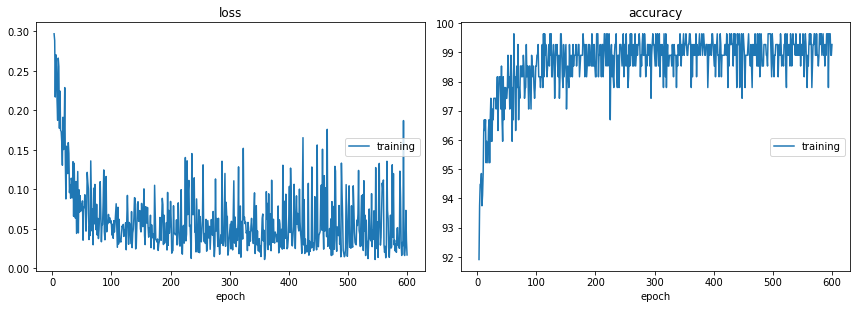

loss:
training   (min:    0.011, max:    0.641, cur:    0.017)

accuracy:
training   (min:   81.985, max:   99.632, cur:   99.265)


KeyboardInterrupt: 

In [28]:
net.train()
liveloss=PlotLosses()
total_step = len(train_X_data)
loss_list = []
acc_list = []
correct = 0
total = 0
for epoch in range(epochs_total):
    logs={}
    for i, (images, labels) in enumerate(zip(train_X_data, train_y_data)):
        outputs = net(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total=labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        
        logs['loss'] = loss.item()
        logs['accuracy'] = correct/total*100
        
        if (i+1)%100==0:
            print('Epochs [{}/{}], Step [{}/{}], loss: {:.4f}, Accuracy: {:.2f}'
                  .format(epoch+1, epochs_total, i+1, total_step, loss.item(), 
                          (correct/total)*100))
    liveloss.update(logs)
    liveloss.draw()
    

In [29]:
net.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(zip(test_X_data, test_y_data)):
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total=labels.size(0)
        correct = (predicted == labels).sum().item()
        
        
    print('Test Accuracy of the model on the test images: {} %'
         .format((correct/total)*100))
    
    
    

D:\Anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test Accuracy of the model on the test images: 98.31223628691983 %


In [30]:
torch.save(net.state_dict(), 'her_model2')

In [ ]:
net.load_state_dict(torch.load('her_model2'))

In [ ]:
accuracy = np.asarray(accuracy_list)
loss = np.asarray(loss_list)

In [ ]:
np.save('acc', accuracy)
np.save('loss', loss)

In [ ]:
import matplotlib.pyplot as plt
import scipy
import cv2
from skimage.color import rgb2gray
image = cv2.imread('eq2.png')
image = cv2.resize(image, (45, 45))
image = rgb2gray(image)
image2 = image.reshape(image.shape[0]*image.shape[1])
#for i in range(image2.shape[0]):
#    if image2[i] > 1:
#        image2[i] = 1
image = image2.reshape(image.shape[0], image.shape[1])
image_tensor = image/255.
#temp_img = cv2.dilate(image_tensor, np.ones((2, 3), np.uint8), iterations=1)
#temp_img = cv2.copyMakeBorder(temp_img, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value= [2.])
temp_img = cv2.resize(temp_img, (45, 45))
image_tensor = torch.from_numpy(temp_img).float().to(device)
image_tensor = image_tensor.view(-1, 45, 45, 1)
net.eval()
with torch.no_grad():
    outputs = net(image_tensor)
    _, predicted = torch.max(outputs.data, 1)
    print('predicted = ', end = ' ')
    get_categories(predicted)
    plt.imshow(image_tensor.cpu().detach().numpy().reshape(45, 45), cmap='gray')
    plt.show()